# ADM-HW2 (Roberto Magno Mazzotta)

This jupyter notebook focus on the following questions:

[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   1. Determine the ten reviewers with the highest number of reviews in the dataset.

   2. What is the percentage of each language used by these top 10 reviewers when submitting a review?

   3. Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming:
         Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

   
   4. Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv') 

[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   1. Determine the ten reviewers with the highest number of reviews in the dataset.

In [3]:
#Group by 'author.steamid' and count the number of reviews per reviewer
review_counts = df.groupby('author.steamid').size()

# Sort the reviewers by the number of reviews in descending order
sorted_review_counts = review_counts.sort_values(ascending=False)

# Extract the top ten reviewers
top_ten_reviewers = sorted_review_counts.head(10)

# Display the results
print(top_ten_reviewers)

author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
dtype: int64


[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   

   2. What is the percentage of each language used by these top 10 reviewers when submitting a review?


In [10]:
#Calculate review counts per reviewer
review_counts = df['author.steamid'].value_counts()

#Get the top ten reviewers
top_ten_reviewers = review_counts.head(10)
top_ten_steamids = top_ten_reviewers.index.tolist()

# Convert 'author.steamid' to string in DataFrame
df['author.steamid'] = df['author.steamid'].astype(str)

# Convert Steam IDs to strings in the list
top_ten_steamids = [str(steamid) for steamid in top_ten_steamids]

#Filter the DataFrame to include only reviews by the top ten reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_ten_steamids)]

#Count the number of reviews per language
language_counts = top_reviewers_df['language'].value_counts()

#Calculate the percentage of each language used
total_reviews = language_counts.sum()
language_percentages = (language_counts / total_reviews) * 100

# Plotting the results
print("Percentage of Each Language Used by the Top 10 Reviewers:")
print(language_percentages)

Percentage of Each Language Used by the Top 10 Reviewers:
language
english     53.939962
russian     28.142589
schinese    17.917448
Name: count, dtype: float64


[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*


   3. Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming:
         Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.


In [11]:
#Identify the Top 10 Reviewers
# Calculate review counts per reviewer
review_counts = df['author.steamid'].value_counts()

# Extract the top ten reviewers
top_ten_reviewers = review_counts.head(10)
top_ten_steamids = top_ten_reviewers.index.tolist()

# Convert 'author.steamid' to string in DataFrame if necessary
df['author.steamid'] = df['author.steamid'].astype(str)
top_ten_steamids = [str(steamid) for steamid in top_ten_steamids]

#Filter the DataFrame to include only reviews by the top ten reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_ten_steamids)]

#Calculate Average Helpful Votes per Review for Each Top Reviewer
average_votes_helpful_top_reviewers = top_reviewers_df.groupby('author.steamid')['votes_helpful'].mean()

# Calculate the Overall Average Helpful Votes per Review
overall_average_votes_helpful = df['votes_helpful'].mean()

#Compile the Results
results_df = pd.DataFrame({
    'Average Helpful Votes': average_votes_helpful_top_reviewers,
    'Number of Reviews': top_ten_reviewers.values
})

#dd Overall Average to the Results for Comparison
results_df['Overall Average Helpful Votes'] = overall_average_votes_helpful

# Display the results
print("Average Number of Helpful Votes Received per Review by the Top 10 Reviewers:")
print(results_df)

Average Number of Helpful Votes Received per Review by the Top 10 Reviewers:
                   Average Helpful Votes  Number of Reviews  \
author.steamid                                                
76561197969749884              26.238636                149   
76561197989746995              21.058140                132   
76561198013146396               0.969697                107   
76561198027973295              11.802083                106   
76561198045381877               2.252427                103   
76561198062813911               0.885906                100   
76561198064946151               3.990000                 99   
76561198192166873              38.897196                 96   
76561198239163744               7.641509                 88   
76561198315585536              49.712121                 86   

                   Overall Average Helpful Votes  
author.steamid                                    
76561197969749884                  404468.855278  
7656119798974

### Observation:
The 'Average Helpful Votes' per reviewer ranges from around 0.88 to 49.71.

The 'Overall Average Helpful Votes' is 404,468.855278 for all reviewers, which seems unusually high and identical across all reviewers.


### 2. Identifying Issues and Anomalies

#### **a. Mismatch in Review Counts:**

**Discrepancy:**
     The 'Number of Reviews' in the 'Average Helpful Votes' table does not match the initial counts of reviews per reviewer.

For example, author.steamid 76561197969749884 has 149 reviews in the table but 88 reviews in the initial counts.

**Possible Cause:** 
There might be a misalignment or sorting issue when merging or displaying the data.

#### **b. Unusually High Overall Average Helpful Votes:**

**Issue:**
     The 'Overall Average Helpful Votes' is 404,468.855278, which is extremely high and the same for all reviewers.

**Possible Causes:**

Outliers in Data: There may be extreme values in the votes_helpful column skewing the average.
Calculation Error: The overall average might have been calculated incorrectly (e.g., summing instead of averaging).


In [12]:
# Find reviews with unusually high votes_helpful
extreme_values = df[df['votes_helpful'] > df['votes_helpful'].quantile(0.99)]

In [13]:
overall_average_votes_helpful = df['votes_helpful'].median()


In [14]:
number_of_reviews = top_reviewers_df['author.steamid'].value_counts()


In [17]:
average_votes_helpful_top_reviewers = top_reviewers_df.groupby('author.steamid')['votes_helpful'].mean()
print(average_votes_helpful_top_reviewers)

author.steamid
76561197969749884    26.238636
76561197989746995    21.058140
76561198013146396     0.969697
76561198027973295    11.802083
76561198045381877     2.252427
76561198062813911     0.885906
76561198064946151     3.990000
76561198192166873    38.897196
76561198239163744     7.641509
76561198315585536    49.712121
Name: votes_helpful, dtype: float64


[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   
   4. Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

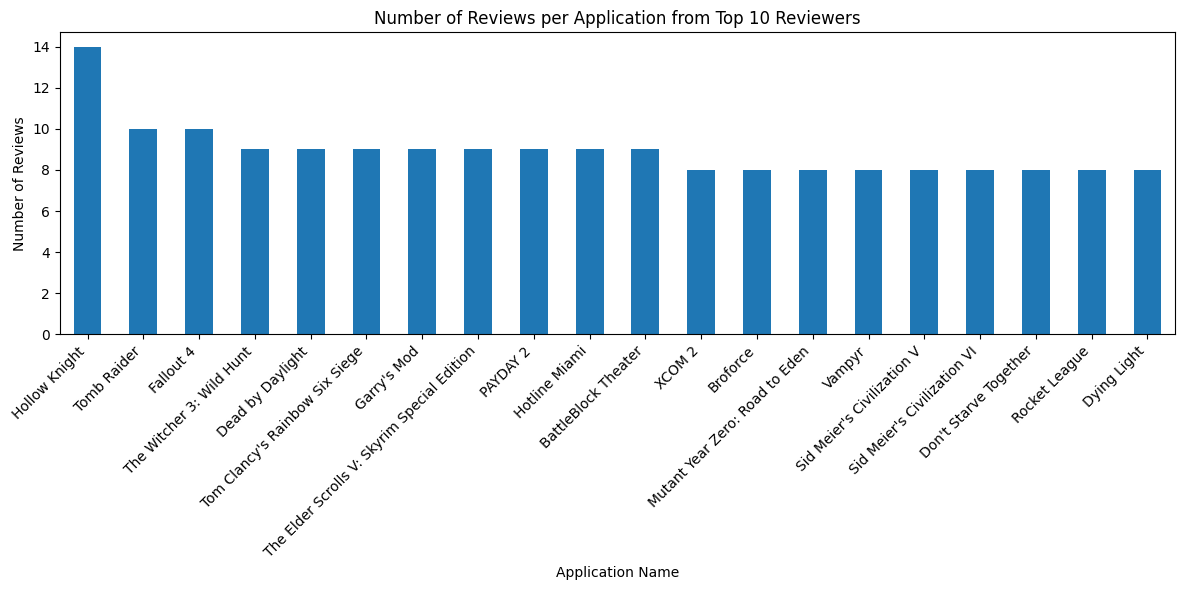

In [18]:
top_ten_steamids = top_ten_reviewers.index.tolist()

# Convert 'author.steamid' to string if necessary
df['author.steamid'] = df['author.steamid'].astype(str)
top_ten_steamids = [str(steamid) for steamid in top_ten_steamids]

# Step 2: Filter Reviews from Top 10 Reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_ten_steamids)]

# Step 3: Count the Number of Reviews per Application
app_review_counts = top_reviewers_df['app_name'].value_counts()

# Step 4: Sort Applications in Descending Order
sorted_app_review_counts = app_review_counts.sort_values(ascending=False)

# Optionally, select the top N applications for clarity (e.g., top 20)
top_n = 20
sorted_app_review_counts = sorted_app_review_counts.head(top_n)

# Step 5: Create the Plot
plt.figure(figsize=(12, 6))
sorted_app_review_counts.plot(kind='bar')

plt.title('Number of Reviews per Application from Top 10 Reviewers')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


[**RQ6**] *Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers.*

   1. Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

   2. Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews.
         What can you say about the number you just calculated?





[**RQ6**] *Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers.*

   1. Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?


In [19]:
# Convert 'timestamp_created' and 'timestamp_updated' to datetime if they are in UNIX timestamp format
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')

# Step 1: Filter the DataFrame by language
english_reviews = df[df['language'] == 'english']
spanish_reviews = df[df['language'] == 'spanish']

# Step 2: Determine edited reviews
english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']

# Step 3: Calculate the proportion of edited reviews
english_edited_rate = english_reviews['is_edited'].mean() * 100  # Percentage
spanish_edited_rate = spanish_reviews['is_edited'].mean() * 100  # Percentage

# Display the results
print(f"Percentage of English reviews that were edited: {english_edited_rate:.2f}%")
print(f"Percentage of Spanish reviews that were edited: {spanish_edited_rate:.2f}%")

Percentage of English reviews that were edited: 11.89%
Percentage of Spanish reviews that were edited: 9.94%


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_28973/3681320525.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_28973/3681320525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']


In [21]:
english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_28973/1001542581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_28973/1001542581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']


##### can i do better ?


In [22]:
# Step 1: Filter the DataFrame by language and create copies
english_reviews = df[df['language'] == 'english'].copy()
spanish_reviews = df[df['language'] == 'spanish'].copy()


In [23]:
# Step 2: Determine edited reviews
english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']

# Step 3: Calculate the proportion of edited reviews
english_edited_rate = english_reviews['is_edited'].mean() * 100  # Percentage
spanish_edited_rate = spanish_reviews['is_edited'].mean() * 100  # Percentage

# Display the results
print(f"Percentage of English reviews that were edited: {english_edited_rate:.2f}%")
print(f"Percentage of Spanish reviews that were edited: {spanish_edited_rate:.2f}%")


Percentage of English reviews that were edited: 11.89%
Percentage of Spanish reviews that were edited: 9.94%


[**RQ6**] *Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers.*

   2. Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews.
         What can you say about the number you just calculated?




In [20]:
# Step 1: Calculate average number of games owned per reviewer in each group
english_avg_games_owned = english_reviews['author.num_games_owned'].mean()
spanish_avg_games_owned = spanish_reviews['author.num_games_owned'].mean()

# Step 2: Calculate average number of games reviewed per reviewer in each group

# For English reviewers
english_reviewers = english_reviews.groupby('author.steamid')
english_games_reviewed = english_reviewers['app_id'].nunique()
english_avg_games_reviewed = english_games_reviewed.mean()

# For Spanish reviewers
spanish_reviewers = spanish_reviews.groupby('author.steamid')
spanish_games_reviewed = spanish_reviewers['app_id'].nunique()
spanish_avg_games_reviewed = spanish_games_reviewed.mean()

# Display the results
print(f"Average number of games owned by English reviewers: {english_avg_games_owned:.2f}")
print(f"Average number of games reviewed by English reviewers: {english_avg_games_reviewed:.2f}")

print(f"Average number of games owned by Spanish reviewers: {spanish_avg_games_owned:.2f}")
print(f"Average number of games reviewed by Spanish reviewers: {spanish_avg_games_reviewed:.2f}")


Average number of games owned by English reviewers: 1369501.66
Average number of games reviewed by English reviewers: 1.81
Average number of games owned by Spanish reviewers: 121.92
Average number of games reviewed by Spanish reviewers: 1.63


##### can i do better ??

In [24]:
# For English reviewers
print(english_reviews['author.num_games_owned'].describe())

count    9.635437e+06
mean     1.369502e+06
std      2.454057e+09
min      0.000000e+00
25%      3.100000e+01
50%      8.400000e+01
75%      1.920000e+02
max      4.398047e+12
Name: author.num_games_owned, dtype: float64


In [25]:
# Find the reviewers with extremely high number of games owned
extreme_values = english_reviews[english_reviews['author.num_games_owned'] > 10000]  # Threshold can be adjusted
print(extreme_values[['author.steamid', 'author.num_games_owned']])


             author.steamid  author.num_games_owned
37521     76561198068747739                   12493
76218     76561198355625888                   17197
293892    76561197990746461                   10697
369497    76561197962290563                   10979
389540    76561197974393359                   10516
...                     ...                     ...
21685833  76561197970526676                   10660
21695895  76561197985036092                   13349
21706787  76561197970539229                   10091
21722651  76561198102767019                   14912
21742883  76561197986617621                   12619

[735 rows x 2 columns]


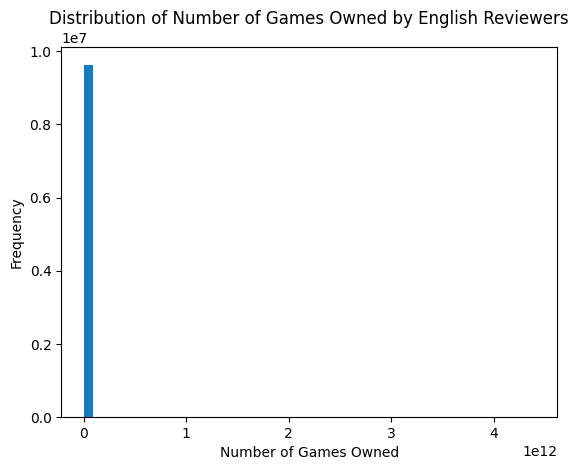

In [26]:
# Plot histogram
plt.hist(english_reviews['author.num_games_owned'], bins=50)
plt.title('Distribution of Number of Games Owned by English Reviewers')
plt.xlabel('Number of Games Owned')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Define an upper limit for number of games owned
upper_limit = english_reviews['author.num_games_owned'].quantile(0.99)  # Exclude top 1%

# Filter out the outliers
english_reviews_filtered = english_reviews[english_reviews['author.num_games_owned'] <= upper_limit]

# Recalculate the average number of games owned
english_avg_games_owned_filtered = english_reviews_filtered['author.num_games_owned'].mean()
print(f"Filtered average number of games owned by English reviewers: {english_avg_games_owned_filtered:.2f}")


Filtered average number of games owned by English reviewers: 146.20


In [28]:
english_median_games_owned = english_reviews['author.num_games_owned'].median()
print(f"Median number of games owned by English reviewers: {english_median_games_owned}")


Median number of games owned by English reviewers: 84.0


In [29]:
print(english_reviews['author.num_games_owned'].dtype)


int64


In [30]:
# Identify non-numeric entries
non_numeric = english_reviews[pd.to_numeric(english_reviews['author.num_games_owned'], errors='coerce').isnull()]
print(non_numeric[['author.num_games_owned']])

# Check for missing values
missing_values = english_reviews['author.num_games_owned'].isnull().sum()
print(f"Number of missing values: {missing_values}")


Empty DataFrame
Columns: [author.num_games_owned]
Index: []
Number of missing values: 0


In [31]:
# Recalculate average number of games owned
english_avg_games_owned = english_reviews_filtered['author.num_games_owned'].mean()
spanish_avg_games_owned = spanish_reviews['author.num_games_owned'].mean()

# Recalculate median number of games owned
english_median_games_owned = english_reviews_filtered['author.num_games_owned'].median()
spanish_median_games_owned = spanish_reviews['author.num_games_owned'].median()

# Display the results
print(f"Average number of games owned by English reviewers (filtered): {english_avg_games_owned:.2f}")
print(f"Median number of games owned by English reviewers: {english_median_games_owned}")

print(f"Average number of games owned by Spanish reviewers: {spanish_avg_games_owned:.2f}")
print(f"Median number of games owned by Spanish reviewers: {spanish_median_games_owned}")


Average number of games owned by English reviewers (filtered): 146.20
Median number of games owned by English reviewers: 83.0
Average number of games owned by Spanish reviewers: 121.92
Median number of games owned by Spanish reviewers: 56.0
